<a href="https://colab.research.google.com/github/HenriqueMAP/electrical-induction-motor/blob/main/Electrical_Engine_Parameters_Nata_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desenvolvido por Natã Rodrigo Santos Pereira

### Link do vídeo: https://youtu.be/GJ_lWGTDPd4

### Github: https://github.com/natrodrigo

---

## Cálculos de Parâmetros de Motores Elétricos

### Enunciado

> Um motor de indução trifásico ligado em Y, de seis polos, tensão de linha de 460Volts, potência ativa de 20kW e frequência de 60Hz, tem os seguintes valores de parâmetros, referidos ao estator:

*   R1 = 0,271 Ohms;
*   R2 = 0,188 Ohms;

*   X1 = 1,12 Ohms;
*   X2 = 1,91 Ohms;

*   Xm = 23,10 Ohms;
*   Escorregamento = 1,6%;

#### Objetivos

>Realize um código na linguagem de programação de sua preferência para calcular:

*   1 - Velocidade;
*   2 - Corrente do estator;
*   3 - Fator de potência;
*   4 - Corrente de rotor;
*   5 - Conjugado de partida;
*   6 - Conjugado máximo;
*   7 - Escorregamento máximo;
*   8 - Velocidade de ocorrência do escorregamento;

##### Gráfico

> Construa uma curva de Conjugado versus Velocidade.
>
> Considere que a variação de escorregamento está entre o intervalo de "0 < s < 1". Ou seja, considere o intervalo completo de variação de "s".

### Formato de entrega

> Realize um pequeno vídeo mostrando os seus resultados e poste no mural digital que está no seguinte link: https://padlet.com/victoriaalejandrafmu/lle1oyktf0nheqmr

#### Datas

> Solicitação: 20/09/2021
> Prazo máximo de entrega: 04/10/2021


## Importação de Bibliotecas

### - math: Cálculos matemáticos
### - matplotlib: Gerar o gráfico

In [43]:
import math
import matplotlib.pyplot as plt

## Definição de funções de cálculos complexos com números imaginários

In [44]:
def somacomplex(v1, v2):
  return complex(v1.real+v2.real, v1.imag+v2.imag)

def subcomplex(v1, v2):
  return complex(v1.real-v2.real, v1.imag-v2.imag)

def multicomplex(v1, v2):
  return complex((v1.real*v2.real)-(v1.imag*v2.imag), (v1.real*v2.imag)+(v1.imag*v2.real))

def divcomplex(v1, v2):
  numerator = (v1*v2.conjugate())
  denominator = (v2*v2.conjugate())
  quotientreal = (numerator.real / denominator.real)
  quotientimag = (numerator.imag / denominator.real)
  return complex(quotientreal, quotientimag)

def polar(v1):
  return math.sqrt(pow(v1.real, 2) + pow(v1.imag, 2)), math.degrees(math.atan(v1.imag / v1.real))

## Definição de parâmetros elétricos e cálculos

In [45]:
# Dados do enunciado
n_polos = int(6)       # Números de Pólos do Motor
v_linha = float(460)   # Tensão de Linha (Volts)
potencia = float(20)   # Potência Ativa (kWatts) 
frequencia = float(60) # Frequência de Operação da Rede (Hz)

R1 = float(0.271) # Resistência do Estator (Ohms)
R2 = float(0.188) # Resistência do Rotor (Ohms)
X1 = float(1.12)  # Indutância do Estator (Ohms)
X2 = float(1.91)  # Indutância do Rotor (Ohms)
Xm = float(23.10) # Indutância de Magnetização (Ohms)

Xm_complex = complex(0, Xm)

escorregamento = float(1.6)

# Conversão de valor percentual para valor numérico
escorregamento = (escorregamento/100)

# Constante do valor de PI
PI = float(math.pi)

# Velocidade Síncrona
n_sinc = math.ceil((120 / n_polos) * frequencia)

# Velocidade do motor (RPM)
nm = math.ceil((1 - escorregamento) * n_sinc)

# Velocidade síncrona (RAD/S)
w_sinc = n_sinc * (PI / 30)

# Velotidade do motor (RAD/S)
wm = nm * (PI / 30)

# Impedância do Estator (Ohms) Real + jImaginário
Z1 = complex(R1, X1)

# Impedância do Rotor  (Ohms) Real + jImaginário
Z2 = complex((R2 / escorregamento), X2)

# Impedância equivalente do motor  (Ohms) Real + jImaginário
Zeq = somacomplex(divcomplex(multicomplex(Z2, Xm_complex), somacomplex(Z2, Xm_complex)), Z1)

# Tensão de linha (Volts)
v_linha = complex(v_linha, 0)

# Tensão de fase (Volts)
v_fase = complex((v_linha.real / math.sqrt(3)), 0)

# Corrente do Estator (Ampére)
I1 = divcomplex(v_fase, Zeq)

# Módulo da Corrente do Estator (Ampére)
I1 = polar(I1)

# Fator de Potência (Percentual)
FP = math.cos(math.radians(I1[1]))

# Tensão de Thevénin (Volts)
Vth = ((Xm * v_fase) / (math.sqrt(pow(R1, 2) + pow(X1 + Xm, 2))))

# Resistência de Thevénin (Ampére)
Rth = (R1 * pow((Xm /(X1 + Xm)), 2))

# Indutância de Thevénin (Ohms)
Xth = X1

# Corrente do Rotor (Ampére)
I2 = (Vth / (math.sqrt(pow((Rth + (R2 / escorregamento)), 2) + pow((Xth + X2), 2))))

# Rendimento ou Eficiência (Porcentagem)
P_EF = (3 * pow(I2, 2) * (R2 / escorregamento))

# Escorregamento Máximo
s_max = (R2 / math.sqrt(pow(Rth, 2) + pow((Xth + X2), 2)))

# Conjugado Induzido (Nm)
t_ind = ((3 * pow(Vth, 2) * (R2 / escorregamento)) / (w_sinc * (pow((Rth + (R2 / escorregamento)),2) + pow((Xth + X2), 2))))

# Conjugado Máximo (Nm)
t_max = ((3 * pow(Vth, 2)) / ((2 * w_sinc) * (Rth + math.sqrt(pow(Rth, 2) + pow((Xth + X2), 2)))))

# Conjugado de Partida (Nm)
t_partida = ((3 * pow(Vth, 2) * (R2 / 1)) / (w_sinc * (pow((Rth + (R2 / 1)), 2) + pow((Xth + X2), 2))))

# Velocidade de ocorrência do escorregamento
n_tmax = ((1 - s_max) * n_sinc)

## Resultados dos cálculos

In [46]:
print("\nVelocidade Síncrona = " + str(n_sinc) + " RPM")
print("\nVelocidade do Motor = " + str(nm) + " RPM")

print("\n-----------------------------------------------")

print("\nVelocidade Síncrona = " + str(w_sinc) + " Rad/s")
print("\nVelocidade do Motor = " + str(wm) + " Rad/s")

print("\n-----------------------------------------------")

print("\nImpedância do Estator = " + str(Z1) + " Ohms")
print("\nImpedância do Rotor = " + str(Z2) + " Ohms")
print("\nImpedância do Equivalente = " + str(Zeq) + " Ohms")

print("\n-----------------------------------------------")

print("\nTensão de Linha = " + str(v_linha) + " Volts")
print("\nTensão de Fase = " + str(v_fase) + " Volts")

print("\n-----------------------------------------------")

print("\nCorrente do Estator = " + str(I1) + " Ampère")
print("\nCorrente do Rotor = " + str(I2) + " Ampère")

print("\n-----------------------------------------------")

print("\nFator de Potência = " + str(FP) + " %")

print("\n-----------------------------------------------")

print("\nTensão de Thevénin = " + str(Vth) + " Volts")
print("\nResistência de Thevénin = " + str(Rth) + " Ampère")
print("\nIndutância de Thevénin = " + str(Xth) + " Ohms")

print("\n-----------------------------------------------")

print("\nRendimento ou Eficiência = " + str(P_EF) + " %")

print("\n-----------------------------------------------")

print("\nEscorregamento Máximo = " + str(s_max) + " ")
print("\nConjugado Máximo = " + str(t_max) + " Nm")

print("\nConjugado Induzido = " + str(t_ind) + " Nm")

print("\nConjugado de Partida = " + str(t_partida) + " Nm")
print("\nVelocidade de Ocorrência do Escorregamento = " + str(n_tmax) + " RPM")


Velocidade Síncrona = 1200 RPM

Velocidade do Motor = 1181 RPM

-----------------------------------------------

Velocidade Síncrona = 125.66370614359172 Rad/s

Velocidade do Motor = 123.67403079631818 Rad/s

-----------------------------------------------

Impedância do Estator = (0.271+1.12j) Ohms

Impedância do Rotor = (11.75+1.91j) Ohms

Impedância do Equivalente = (8.48239943208324+6.741948953497722j) Ohms

-----------------------------------------------

Tensão de Linha = (460+0j) Volts

Tensão de Fase = (265.5811238272279+0j) Volts

-----------------------------------------------

Corrente do Estator = (24.510600566975313, -38.47824811868214) Ampère

Corrente do Rotor = (20.470295100346398+0j) Ampère

-----------------------------------------------

Fator de Potência = 0.7828444331178602 %

-----------------------------------------------

Tensão de Thevénin = (253.28406121497764+0j) Volts

Resistência de Thevénin = 0.24651592101306422 Ampère

Indutância de Thevénin = 1.12 Ohms


## Gráfico: Curva de Conjugado Induzido versus Velocidade Síncrona

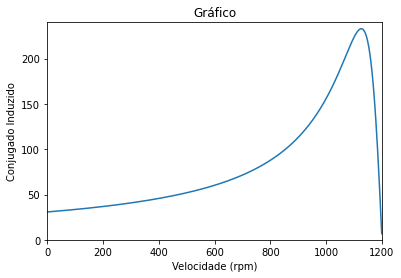

In [47]:
induzido = []

for index in range(0, 1200):
  s = ((1200 - index) / 1200)
  induzido.append(((3 * pow(Vth, 2) * (R2 / s)) / (w_sinc * (pow((Rth + (R2 / s)), 2) + pow((Xth + X2), 2)))).real)

plt.xlabel("Velocidade (rpm)")
plt.ylabel("Conjugado Induzido")
plt.plot(induzido)
plt.axis([0,1200,0,240])
plt.title("Gráfico")
plt.show()